# Machine Learning on Text: Clustering Assignment

In [ ]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def preprocess(docs): 
    lemmatizer = WordNetLemmatizer() 
    stemmer = SnowballStemmer('english') 
    
    preprocessed = []
    for doc in docs: 
        tokenized = word_tokenize(doc)
        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) for token in tokenized 
               if not token.lower() in stopwords.words('english') 
               if token.isalpha()]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
        
    return preprocessed

### Ingest the company_profiles data set into a corpus.

In [ ]:
path = '/content/drive/My Drive/Thinkful Data Science/Assignments/company_profiles'
DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(path, DOC_PATTERN)

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [ ]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

In [ ]:
docs[0]

"Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. It operates in three segments: Life Sciences and Applied Markets, Diagnostics and Genomics, and Agilent CrossLab. The Life Sciences and Applied Markets segment offers liquid chromatography systems and components; liquid chromatography mass spectrometry systems; gas chromatography systems and components; gas chromatography mass spectrometry systems; inductively coupled plasma mass spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; inductively coupled plasma optical emission spectrometry instruments; raman spectroscopy; microfluidics based automated electrophoresis products; cell analysis plate based assays; laboratory software and informatics systems; laboratory automation; dissolution testing; vacuum pumps; and measurement technologies. The Diagnostics and Genomics segment provides 

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [ ]:
preprocessed = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [ ]:
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(preprocessed)

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb813244438>,
                 k=None, metric=None, model=None, timings=True)

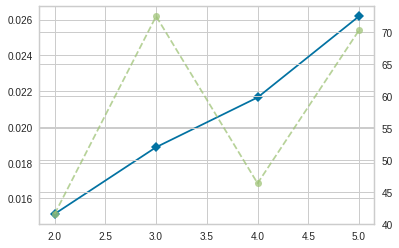

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette')

visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [ ]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectorized)

array([4, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
clusters[0:30]

array([4, 0, 0, 0, 4, 0, 0, 4, 0, 4, 4, 2, 4, 2, 0, 0, 4, 3, 0, 2, 0, 0,
       0, 4, 0, 2, 0, 3, 0, 2], dtype=int32)

### Perform Agglomerative Clustering using the same number of clusters.

In [ ]:
model_agg = AgglomerativeClustering(n_clusters=5)
clusters_agg = model_agg.fit_predict(vectorized.toarray())
clusters_agg[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 3, 0, 1, 2, 0,
       2, 0, 0, 1, 0, 3, 2, 1])

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [ ]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 5

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) 
            for i in topic.argsort()[:-num_keywords - 1:-1]] 
           for topic in model.components_]

In [ ]:
results

[[('loan', 2.136357025117211),
  ('bank', 1.4122123393161365),
  ('deposit', 1.0445172357937962),
  ('account', 0.9137133305126688),
  ('servic', 0.7083105874493808)],
 [('servic', 0.9343178555497942),
  ('product', 0.7472859494160097),
  ('segment', 0.6499361261323537),
  ('solut', 0.6025934765539548),
  ('system', 0.5785400117267288)],
 [('gas', 1.1830154320104553),
  ('natur', 0.908285704225523),
  ('oil', 0.8979399875028387),
  ('energi', 0.482767827894021),
  ('texa', 0.3899062155937711)],
 [('invest', 1.326446153940098),
  ('fund', 0.9077078687939334),
  ('incom', 0.47322788293960855),
  ('equiti', 0.45838012117561977),
  ('manag', 0.45055903483287507)],
 [('treatment', 0.7904667483432003),
  ('phase', 0.7287255962801571),
  ('clinic', 0.722344601222494),
  ('trial', 0.6577170120530795),
  ('develop', 0.6075938133692568)]]